# Lab 3 - Gradient descent and regularization </br> M1 Data Science, ML1

In [1]:
# %%
# "IPython magic command" to sutomatically reload the imported packages after changes in a package
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import sklearn

# plt.rc("font", **{"family": "sans-serif", "sans-serif": ["Helvetica"]})
# plt.rc("text", usetex=True)

SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

plt.rc("font", size=SMALL_SIZE)  # default text size
plt.rc("axes", titlesize=SMALL_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title

# display backend for matplotlib
%matplotlib inline
# %matplotlib widget
# %matplotlib notebook

<div class="" style="margin-top: 0px">

Lab report written by: **Gwenn Garrigues**, **Danila Pechenev**
</div>

# Exercise 1: introduction to gradient descent

Consider the minimization of a quadratic form in $\mathbb{R}^2$ ($N=2$)

$$ f(x) = \frac{1}{2}  \big( x_1^2 + \eta x_2^2 \big) $$ 

with $\eta>0$ fixed. The function and gradient of the function are implemented below.

In [2]:
eta = 8
f = lambda x: (x[..., 0] ** 2 + eta * x[..., 1] ** 2) / 2
grad_f = lambda x: np.array([x[0], eta * x[1]])

The contourplot of the function $f$ is displayed below, with its unique global minimizer $\mathbf{x}^*$ (kown in this case).

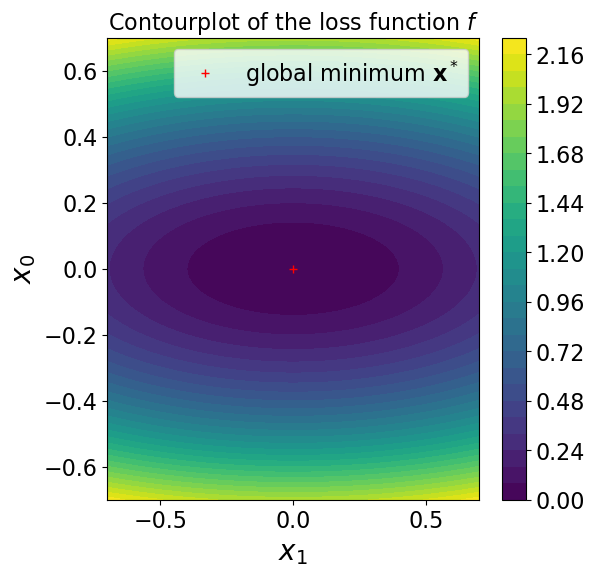

In [3]:
t = np.linspace(-0.7, 0.7, 101)
[u, v] = np.meshgrid(t, t)
F = (u**2 + eta * v**2) / 2

plt.figure(figsize=(6, 6))
plt.contourf(t, t, F, 35)
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_0$")
plt.colorbar()
plt.plot(0, 0, "r+", label=r"global minimum $\mathbf{x}^*$")
plt.title(r"Contourplot of the loss function $f$")
plt.legend()
plt.show()

The rest of the exercise is aimed at illustrating the behaviour of the gradient descent algorithm to find the minimizer of the function $f$.

<div class="alert" style="margin-top: 0px">

1. Given the code provided for the objective function `f` and its gradient `grad_f`, complete the code cell below to implement a `gradient_descent` algorithm.

</div>

In [4]:
def gradient_descent(
    x0: np.ndarray, f, grad_f, tau: float, niter: int
) -> list[np.ndarray, np.ndarray]:
    r"""Basic implementation of the gradient descent algorithm, with fixed
    stepsize and predefined number of iterations.

    Parameters
    ----------
    x0 : _np.ndarray
        Algorithm starting point.
    f : lambda function
        Lambda function used to evaluate the loss function.
    grad_f : lambda function
        Lambda function used to evaluate the gradient of the loss function.
    tau : float
        Algorithm stepsize.
    niter : int
        Number of iterations of the algorithm.

    Returns
    -------
    X: np.ndarray
        Sequence of iterates generated by then algorithm, with shape `(niter, *x0.shape)`.
    objective: np.ndarray
        Value of the objective function evaluated in each iterate, of shape `(niter+1, )`.
    """
    X = np.zeros((niter + 1, *x0.shape))
    X[0] = x0
    objective = np.zeros((niter + 1,))

    objective[0] = f(x0)

    for k in range(niter):
        X[k + 1] = X[k] - tau * grad_f(X[k])
        objective[k + 1] = f(X[k + 1])

    return X, objective

<div class="alert" style="margin-top: 0px">

2. Use the code provided below to run the algorithm with different values of $\tau \in \{0.25,0.225,0.2,0.05\}$. Qualitatively, is the algorithm converging for each of these values? For which value does it converge the fastest to the solution?

</div>

In [5]:
def draw_plots_stepsize(stepsize):
    niter = 30
    x0 = np.array([0.6, 0.6])
    X, objective = gradient_descent(x0, f, grad_f, stepsize, niter)

    plt.figure()
    plt.plot(np.log10(objective), "o-")
    plt.xlabel(r"Iteration $k$")
    plt.ylabel(r"$f(\mathbf{x}^{(k)})$")
    plt.title("Evolution of the loss across iterations")
    plt.show()

    plt.figure(figsize=(8, 8))
    plt.contourf(t, t, F, 35)
    plt.plot(X[:, 0], X[:, 1], "w--+", label=r"iterates $\mathbf{x}^{(k)}$")
    plt.plot(x0[0], x0[1], "g+", label=r"$\mathbf{x}^{(0)}$")
    plt.plot(0, 0, "r+", label=r"global minimum $\mathbf{x}^*$")
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_0$")
    plt.colorbar()
    plt.legend()
    plt.title(r"Evolution of the iterates")
    plt.show()

stepsize: 0.25


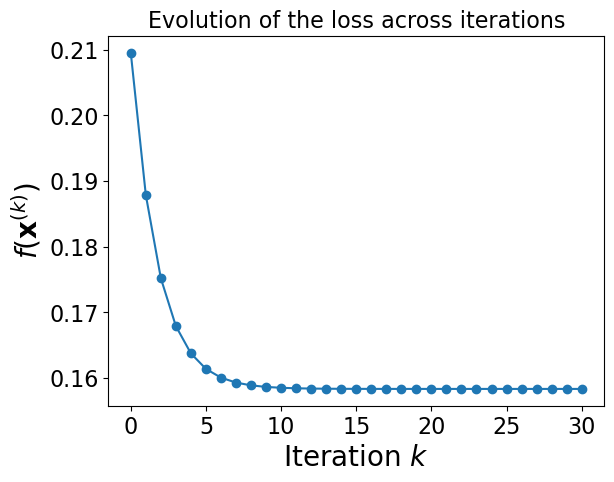

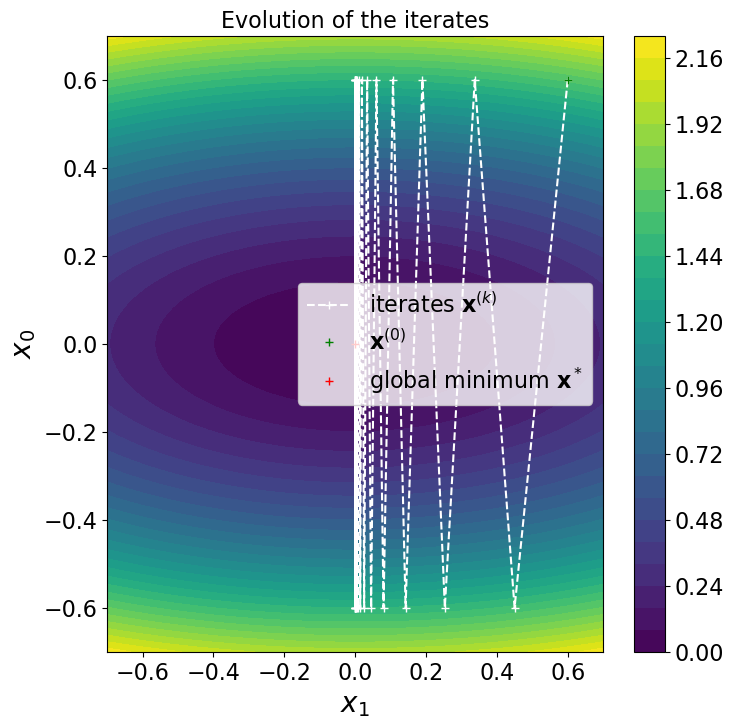

stepsize: 0.225


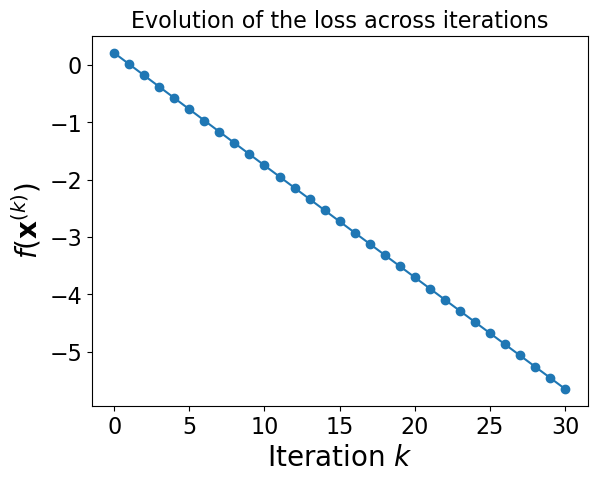

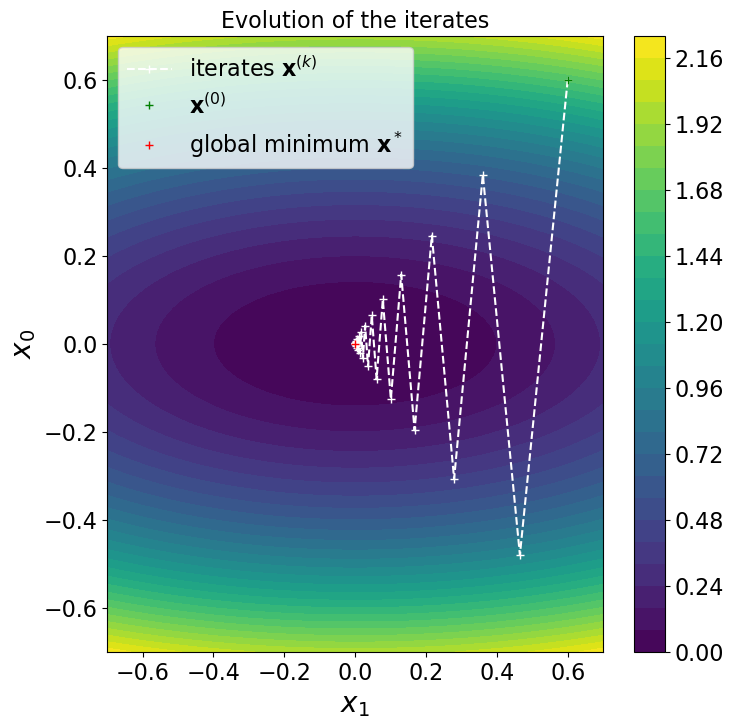

stepsize: 0.2


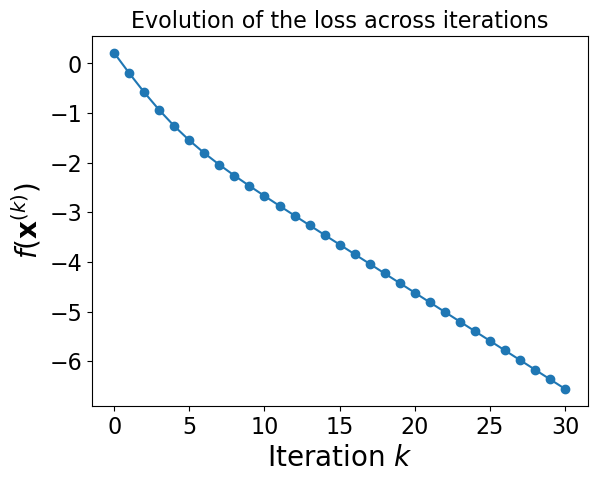

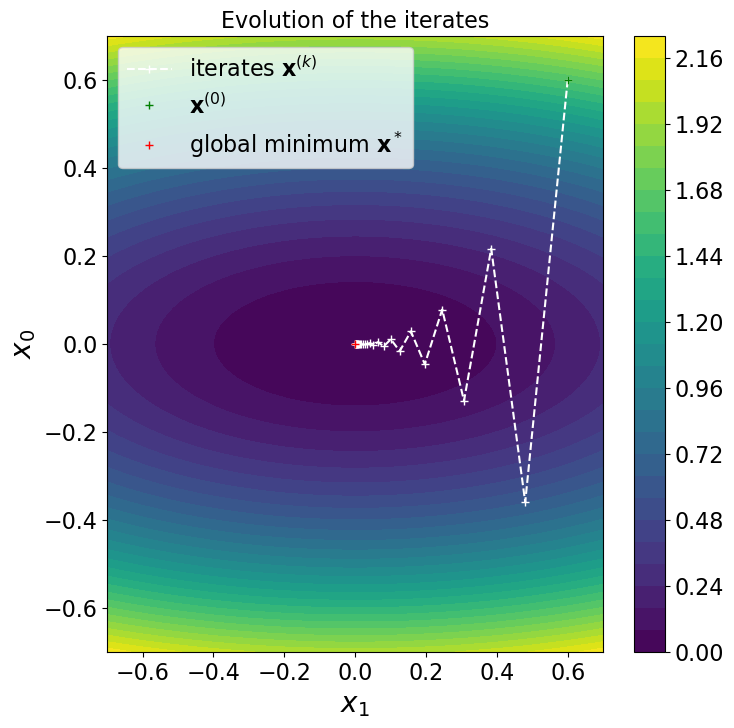

stepsize: 0.05


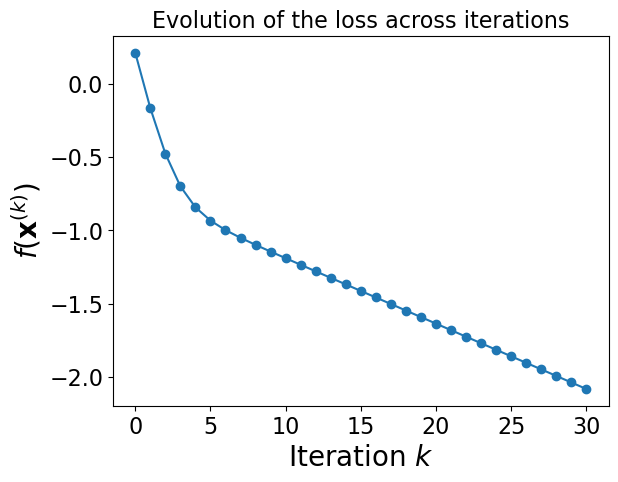

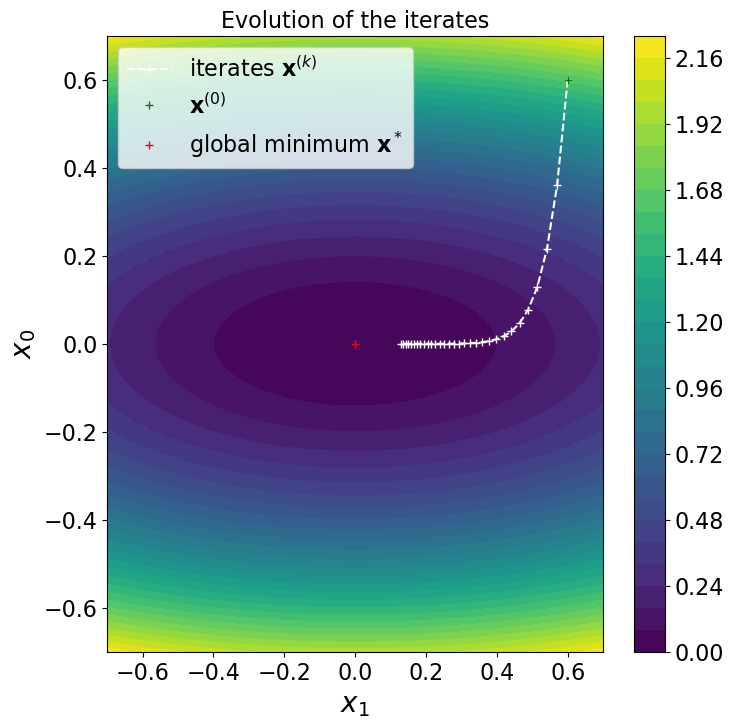

In [6]:
for stepsize in [0.25, 0.225, 0.2, 0.05]:
    print(f"stepsize: {stepsize}")
    draw_plots_stepsize(stepsize)

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
We get the following results for the following stepsizes:

* 0.25 -> the algorithm does not converge to the minimum. That is because the value of the stepsize is too large.
* 0.225 -> the algorithm converges slowly.
* 0.2 -> the algorithm converges faster than for the stepsize=0.225.
* 0.05 -> the algorithm does not converge because the stepsize is too small but it may converge with more iterations.
</div>

<div class="alert" style="margin-top: 0px">

3. Try a different initial estimate (i.e., a randomly generated one), with $\tau = 0.2$. Does the algorithm still converge to the solution of the problem for this example? 

> Indication: Do not hesitate to increase the number of iterations to answer the question.

</div>

In [7]:
def draw_plots_init(x0):
    niter = 30
    stepsize = 0.2

    X, objective = gradient_descent(x0, f, grad_f, stepsize, niter)

    r = np.maximum(np.abs(np.min(x0)), np.abs(np.max(x0)))

    t = np.linspace(-r - 0.5, r + 0.5, 101)
    [u, v] = np.meshgrid(t, t)
    F = (u**2 + eta * v**2) / 2
    
    plt.figure(figsize=(8, 8))
    plt.contourf(t, t, F, 35)
    plt.plot(X[:, 0], X[:, 1], "w--+", label=r"iterates $\mathbf{x}^{(k)}$")
    plt.plot(x0[0], x0[1], "g+", label=r"$\mathbf{x}^{(0)}$")
    plt.plot(0, 0, "r+", label=r"global minimum $\mathbf{x}^*$")
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_0$")
    plt.colorbar()
    plt.legend()
    plt.title(r"Evolution of the iterates")
    plt.show()

x0: [0.37454012 0.95071431]


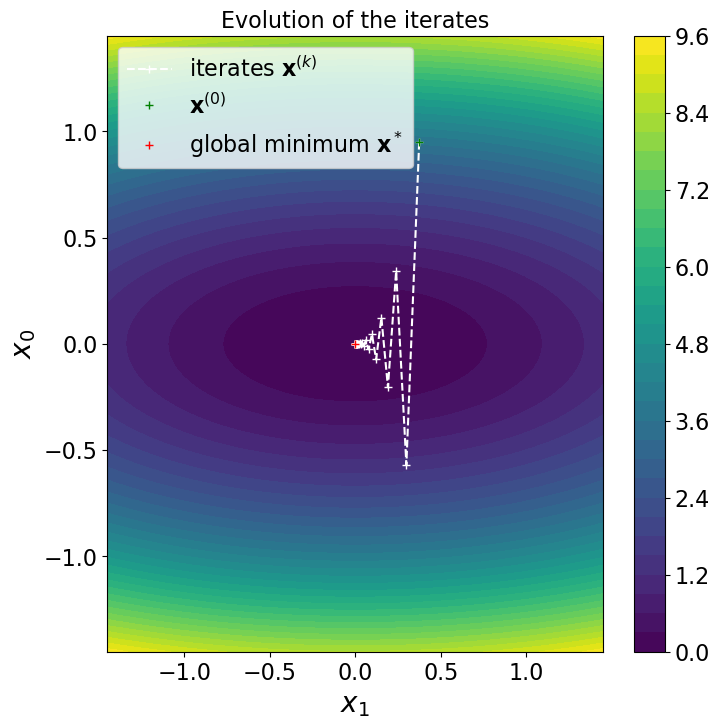

x0: [0.73199394 0.59865848]


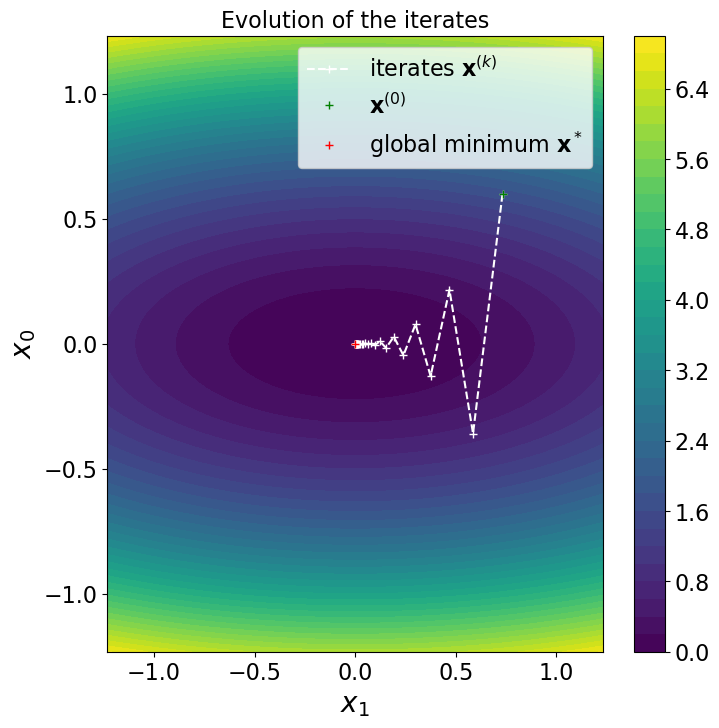

x0: [0.15601864 0.15599452]


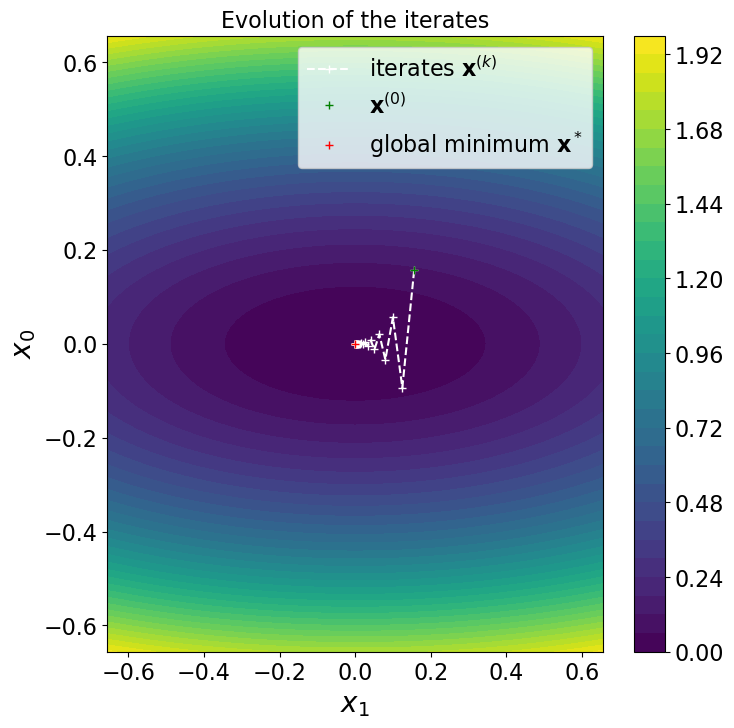

x0: [0.05808361 0.86617615]


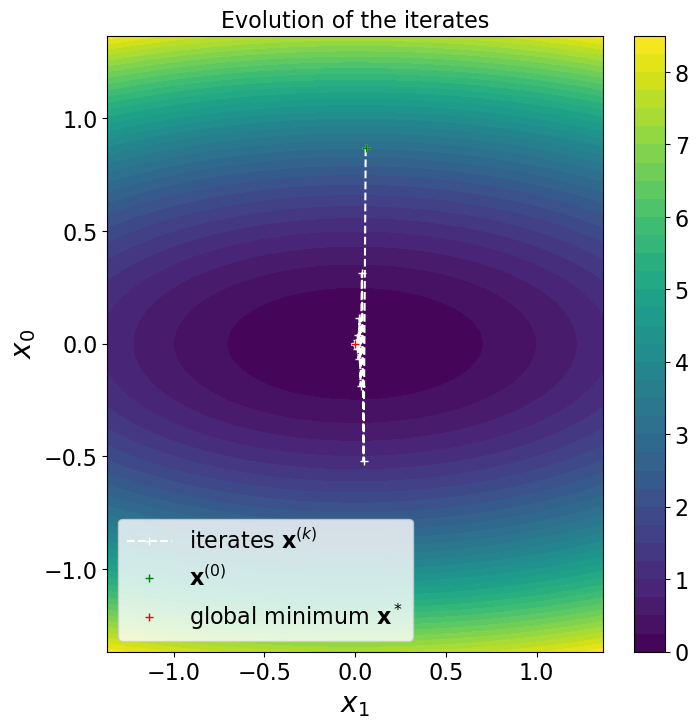

x0: [0.60111501 0.70807258]


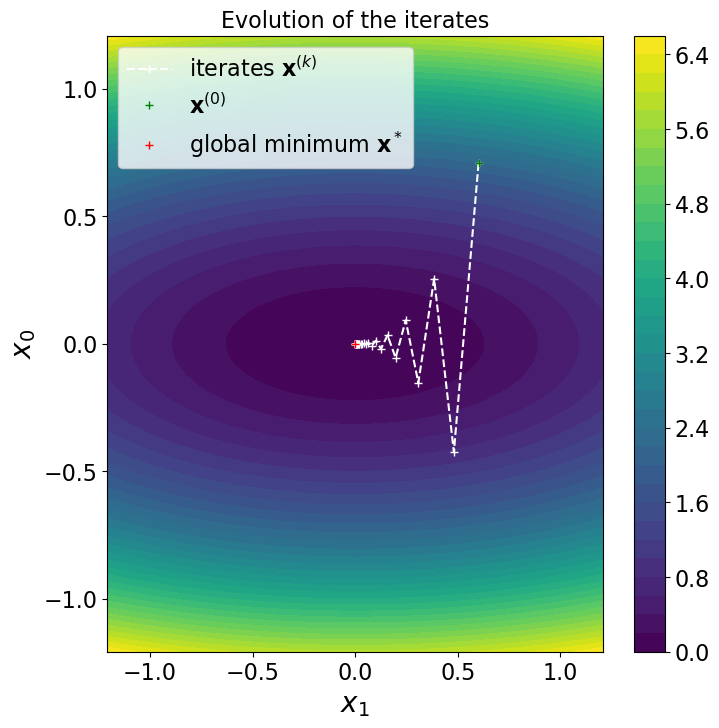

In [8]:
np.random.seed(42)
for _ in range(5):
    x0 = np.random.rand(2)
    print(f"x0: {x0}")
    draw_plots_init(x0)

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
The algorithm converges regardless of the initial value of the estimate x0.
</div>

# Exercise 2: ridge regression

Let $N, M$ be two postive integers, and consider a dataset $\mathcal{D} = \{ (y_n \mathbf{x}_n) \}_{1 \leq n \leq N}$, with targets $\mathbf{y} = (y_n)_{1 \leq n \leq N} \in \mathbb{R}^N$, and (standardized) data $\mathbf{X} = [\mathbf{x}_1, \dotsc, \mathbf{x}_N]^T \in \mathbb{R}^{N \times M}$.

This exercise is aimed at performing ridge regression with `sklearn`, formulated as follows

\begin{equation}
    \tag{ridge}
    \boldsymbol{\beta}^* \in \arg\min_{\boldsymbol{\beta} = (\beta_m)_{0 \leq m \leq M}} \frac{1}{2N} \| \mathbf{y} - \widetilde{\mathbf{X}} \boldsymbol{\beta} \|_2^2 + \lambda \|\boldsymbol{\beta}_{1:M} \|_2^2,
\end{equation}

with $\widetilde{\mathbf{X}} = [\phi(\mathbf{x}_1), \dotsc, \phi(\mathbf{x}_n)]^T \in \mathbb{R}^{N \times (M + 1)}$ and $\phi: \mathbf{x} \mapsto [1, \mathbf{x}^T]^T$.

We will use the `California house` dataset, loaded below.

In [9]:
# loading the dataset
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

# X = housing.data, y = housing.target
X = housing.data
y = housing.target

print(X.shape, y.shape)
print(housing.feature_names)

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


<div class="alert" style="margin-top: 0px">

1. Divide the data into a train and a test set, the latter composed of 20% of the samples.

    In the following, any cross-validation step will be conducted on the training set, the test step being kept the assess the model quality.

> Indication: use the function [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#train-test-split).

</div>

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<div class="alert" style="margin-top: 0px">

2. Adapt the code below to perform ridge regression, adjusting the regularization parameter $\lambda$ in the set $\{10^{-3}, 10^{-2}, 10^{-1}, 1, 10, 100, 1000\}$ with 5-fold cross-validation.

> Indication: 
> - to perform ridge regression with cross-validation for the choice of the regularization parameter, see [sklearn.linear_model.RidgeCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) with the [associated example](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification) from the documentation;
> - take a look at the following fields from the object `pipe.named_steps['ridgecv']`, in particular `alpha_`, `coef_`, `intercept_`, and `best_score_`.
<!-- > - see the `sklearn` tutorial on [grid-search](https://scikit-learn.org/stable/modules/grid_search.html) to adjust the regularization parameter. -->

</div>

In [11]:
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

ridge_regression = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1, 10, 100, 1000], cv=5)
ridge_scaler = StandardScaler()

ridge_pipe = Pipeline(steps=[("scaler", ridge_scaler), ("ridgecv", ridge_regression)])
ridge_pipe.fit(X_train, y_train)

,steps,"[('scaler', ...), ('ridgecv', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,alphas,"[0.001, 0.01, ...]"
,fit_intercept,True
,scoring,None
,cv,5


In [12]:
print("For the best regressor we have:")
print(f"    best_score: {ridge_pipe.named_steps['ridgecv'].best_score_}")
print(f"    alpha: {ridge_pipe.named_steps['ridgecv'].alpha_}")
print(f"    intercept: {ridge_pipe.named_steps['ridgecv'].intercept_}")
print(f"    coef: {ridge_pipe.named_steps['ridgecv'].coef_}")

For the best regressor we have:
    best_score: 0.6114839952527685
    alpha: 0.001
    intercept: 2.071946937378619
    coef: [ 0.85438297  0.12254632 -0.29440993  0.33925924 -0.0023077  -0.04082911
 -0.89692811 -0.869841  ]


<div class="alert" style="margin-top: 0px">

3. Complete the code below to visualize the regression coefficients in function of the value of the regularization parameter $\lambda$. Comment on the evolution of their magnitude.

</div>

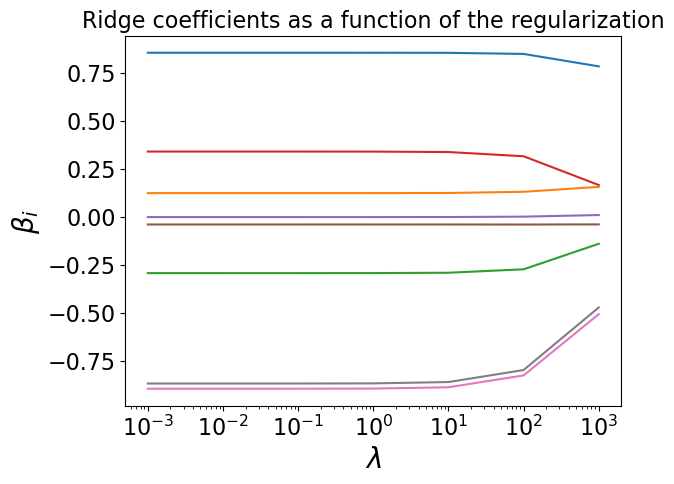

In [13]:
# code
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html

alphas = [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]
coefs = []
pipe_loop = sklearn.pipeline.make_pipeline(
    sklearn.preprocessing.StandardScaler(),
    sklearn.linear_model.Ridge(fit_intercept=True),
)

for a in alphas:
    pipe_loop.set_params(**{"ridge__alpha": a})

    # fit pipeline on X_train, y_train
    pipe_loop.fit(X_train, y_train)
    
    # append regressor to the coefs list
    coefs.append(pipe_loop[1].coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$\beta_i$")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
We can interpret the graph as follows:

* $\lambda$ is small ($10^{-3} - 1$) -> almost no regularization (close to ordinary least squares). No change in weights.
* $\lambda$ is larger ($10^{1} - 10^2$) -> first changes in weights towards zero. Normal regularization.
* $\lambda$ is large ($10^3$) -> very strong regularization. The weights start converging faster to zero.
</div>

<div class="alert" style="margin-top: 0px">

4. Retrieve the best regressor obtained on the training set $\widehat{\boldsymbol{\beta}}$, and evaluate the MSE on the scaled test set.

</div>

In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
pipe_best = sklearn.pipeline.make_pipeline(
    sklearn.preprocessing.StandardScaler(),
    sklearn.linear_model.Ridge(alpha=0.001),
)

pipe_best.fit(X_train, y_train)

mean_squared_error(y_test, pipe_best.predict(X_test))

0.555891561835012

## (Bonus) Lasso regression

Exercise 2 can be easily adapted to perform Lasso regression, which is formulated as

\begin{equation*}
    \tag{Lasso}
    \boldsymbol{\beta}^* \in \arg\min_{\boldsymbol{\beta} = (\beta_m)_{0 \leq m \leq M} } \frac{1}{2N} \| \mathbf{y} - \widetilde{\mathbf{X}} \boldsymbol{\beta} \|_2^2 + \lambda \| \boldsymbol{\beta}_{1:M} \|_1.
\end{equation*}

<div class="alert" style="margin-top: 0px">

5. (Bonus) Adapt the code from question 1 to perform Lasso regression, adjusting the regularization parameter in the set $\{10^{-3}, 10^{-2}, 10^{-1}, 1\}$ using 5-fold cross-validation.

    > Indication: 
    > to perform Lasso regression with cross-validation for the choice of the regularization parameter, see [sklearn.linear_model.LassoCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html).

</div>

In [16]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso

In [17]:
lasso_regression = LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1], cv=5)
lasso_scaler = StandardScaler()

lasso_pipe = Pipeline(steps=[("scaler", lasso_scaler), ("lassocv", lasso_regression)])
lasso_pipe.fit(X_train, y_train)

,steps,"[('scaler', ...), ('lassocv', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,eps,0.001
,n_alphas,'deprecated'
,alphas,"[0.001, 0.01, ...]"
,fit_intercept,True


<div class="alert" style="margin-top: 0px">

6. (Bonus) Visualize the regression coefficients in function of the value of the regularization parameter $\lambda$. Comment on the evolution of their magnitude, and compare with the results obtained in question 2.

</div>

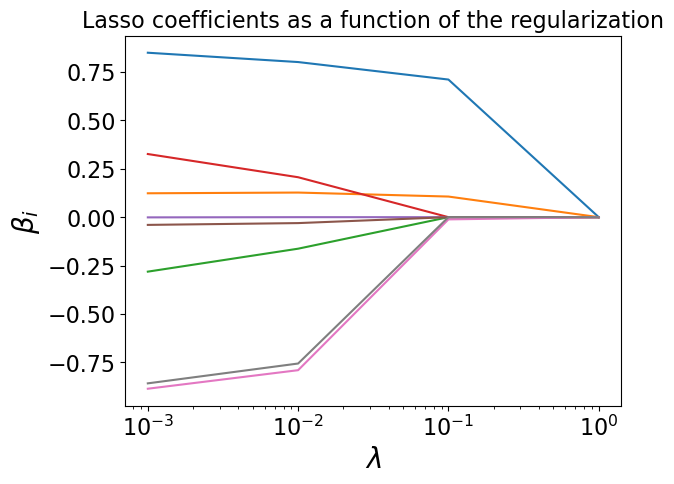

In [18]:
alphas = [1e-3, 1e-2, 1e-1, 1]
coefs = []
pipe_loop = sklearn.pipeline.make_pipeline(
    sklearn.preprocessing.StandardScaler(),
    sklearn.linear_model.Lasso(fit_intercept=True),
)

for a in alphas:
    pipe_loop.set_params(**{"lasso__alpha": a})

    # fit pipeline on X_train, y_train
    pipe_loop.fit(X_train, y_train)
    
    # append regressor to the coefs list
    coefs.append(pipe_loop[1].coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$\beta_i$")
plt.title("Lasso coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
We can interpret the graph as follows:

* $\lambda$ is from $10^{-3}$ to $10^{-2}$ -> the weights are changing slightly towards zero. Normal regularization.
* $\lambda$ is from $10^{-2}$ to $10^{-1}$ -> the weights are changing radically towards zero. Some of them reach 0 at $\lambda=10^{-1}$. Strong regularization.
* $\lambda$ is from $10^{-1}$ to $1$ -> extremely strong regularization. At $\lambda=1$ all weights are 0.
</div>

<div class="alert" style="margin-top: 0px">

7. (Bonus) Retrieve the best regressor obtained on the training set $\widehat{\boldsymbol{\beta}}$, and evaluate the error on the scaled test set.

</div>

In [19]:
print(f"Alphas: {lasso_pipe[1].alphas_}")
print()
print("For the best regressor we have:")
print(f"    mse_path: {[alpha_results.mean() for alpha_results in lasso_pipe.named_steps['lassocv'].mse_path_]}")
print(f"    alpha: {lasso_pipe.named_steps['lassocv'].alpha_}")
print(f"    intercept: {lasso_pipe.named_steps['lassocv'].intercept_}")
print(f"    coef: {lasso_pipe.named_steps['lassocv'].coef_}")

Alphas: [1.    0.1   0.01  0.001]

For the best regressor we have:
    mse_path: [np.float64(1.3369296823892658), np.float64(0.6720927784211496), np.float64(0.5243705079512789), np.float64(0.5192475590950301)]
    alpha: 0.001
    intercept: 2.071946937378622
    coef: [ 0.84914038  0.12334631 -0.28127333  0.32604963 -0.00106185 -0.03988954
 -0.88582217 -0.85809324]


<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
With $\alpha=0.001$ the model attains the minimum MSE error
</div>

In [20]:
pipe_best = sklearn.pipeline.make_pipeline(
    sklearn.preprocessing.StandardScaler(),
    sklearn.linear_model.Lasso(alpha=0.001),
)

pipe_best.fit(X_train, y_train)

mean_squared_error(y_test, pipe_best.predict(X_test))

0.5544913600832686

---

End of lab3.